# Tutorial 2 - Transfer Learning - Object Detection

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

# Download and load the model

You can visit tensorflow's keras applications (tf.keras.application) on the Web to see more models

In [2]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

# Import images you want to use

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt

# Note: the target sizes of the images must be the same for future processing

img1 = load_img("test_images/image1.jpg",
               color_mode='rgb',
               target_size=(100,161)
              )

img2 = load_img("test_images/image2.jpg",
               color_mode='rgb',
               target_size=(100,161)
              )



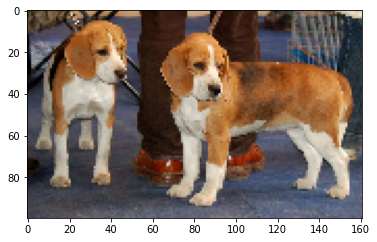

In [4]:
plt.imshow(img1)

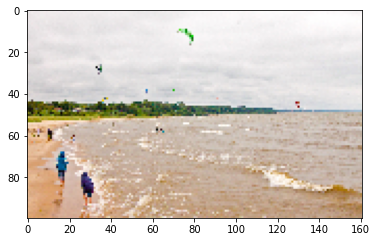

In [5]:
plt.imshow(img2)

# Pre-process images

In [6]:
# Convert both images to numpy

img1_np = np.array(img1)

img2_np = np.array(img2)

# Create a new numpy array by combining both images
imgs = np.array([img1_np, img2_np])

imgs.shape

(2, 100, 161, 3)

In [7]:
imgs

array([[[[ 52,  37,  30],
         [ 78,  62,  47],
         [ 56,  41,  34],
         ...,
         [197, 190, 174],
         [209, 198, 178],
         [220, 209, 187]],

        [[ 75,  58,  50],
         [ 91,  76,  53],
         [ 48,  44,  32],
         ...,
         [222, 210, 188],
         [238, 221, 203],
         [236, 222, 196]],

        [[ 58,  43,  36],
         [ 98,  77,  46],
         [ 46,  33,  27],
         ...,
         [219, 206, 189],
         [239, 224, 195],
         [236, 221, 192]],

        ...,

        [[ 63,  66,  75],
         [ 67,  67,  79],
         [ 60,  63,  80],
         ...,
         [106, 117, 135],
         [ 90,  95, 125],
         [100, 107, 135]],

        [[ 68,  69,  74],
         [ 68,  67,  81],
         [ 66,  65,  79],
         ...,
         [ 84, 105, 134],
         [ 86, 101, 132],
         [ 97, 105, 142]],

        [[ 68,  67,  83],
         [ 73,  71,  82],
         [ 63,  65,  78],
         ...,
         [110, 107, 128],
        

In [8]:
# Resnet50 specifically requires 224x224 images. You can crop and resize
# to maintain the aspect ratio if needed

img_resized = tf.image.resize(imgs, [224, 224])

img_resized.shape

TensorShape([2, 224, 224, 3])

# Use the model

In [9]:
# Generate the inputs
inputs = keras.applications.resnet50.preprocess_input(img_resized)

# Generate the predictions
Y_proba = model.predict(inputs)

In [10]:
# Retrieve the top 5 objects identified in the images

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)
for image_index in range(len(imgs)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n02089973 - English_foxhound 86.50%
  n02089867 - Walker_hound 7.19%
  n02088466 - bloodhound   2.67%
  n02088364 - beagle       0.38%
  n02088238 - basset       0.37%

Image #1
  n09428293 - seashore     65.92%
  n09421951 - sandbar      6.62%
  n04371430 - swimming_trunks 5.49%
  n03888257 - parachute    3.87%
  n02837789 - bikini       2.60%

